# Working with Rasters


In [2]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot

### Reading with Rasterio

(44, 67)
[[11438.554 11438.554 11438.554 ...     0.    11438.554 11438.554]
 [    0.        0.        0.    ...     0.    11430.308 11430.308]
 [    0.        0.        0.    ...     0.    11422.026 11422.026]
 ...
 [    0.        0.        0.    ...     0.        0.        0.   ]
 [    0.        0.        0.    ...     0.        0.        0.   ]
 [    0.        0.        0.    ... 11052.858 11052.858 11052.858]]


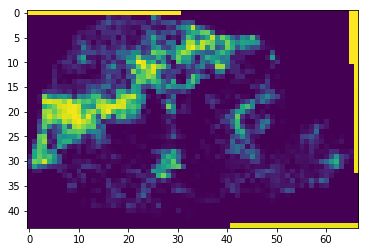

In [3]:
import rasterio
src = rasterio.open('data/rasters_crops/crops_2005.tif')
ar = src.read(1)
print(ar.shape)
print(ar)
pyplot.imshow(ar)

### Reading with GDAL

(44, 67)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Total Pix Value:  3918382.5


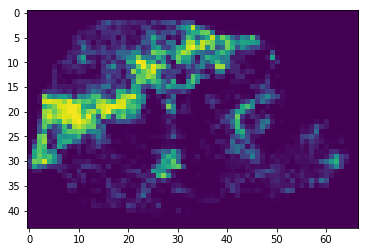

In [4]:
from osgeo import gdal

ds = gdal.Open('data/rasters_crops/crops_2005.tif')
band = ds.GetRasterBand(1)

# read raster as numpy array
ar = band.ReadAsArray()

# Then, we can do various processings using our familiar numpy array object

# correct border effects done during grid creation - easy as numpy array
(r,c) = ar.shape
ar[[0,1], :] = 0.
ar[r-1, :] = 0.
ar[:, [c-2, c-1]] = 0.
print(ar.shape)
print(ar)
pyplot.imshow(ar)   

# or get some summary statistics of the image
print("Total Pix Value: ", ar.sum())

### Perform Operations

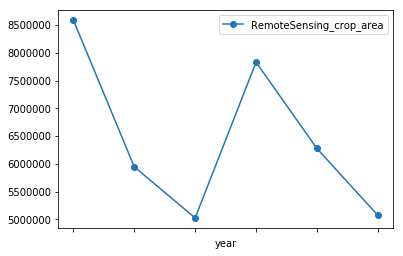

In [5]:
# get crop mask arrays
rasters = glob.glob("./data/rasters_crops/crops_*.tif")
raster_data = []
for b in range(len(rasters)):
    raster_name = rasters[b]
    y = raster_name.split('_')[-1].split(".tif")[0]
    
    ds = gdal.Open(rasters[b])
    band = ds.GetRasterBand(1)
    data_array = band.ReadAsArray()

    raster_data.append([y, data_array.sum()])
df = pd.DataFrame(data=raster_data,  columns = ["year", "RemoteSensing_crop_area"])
df.index = df['year']
_ = df.plot(marker='o')

### Extract geo info from geotif

In [6]:
from osgeo import gdal, osr
d = gdal.Open("data/rasters_crops/crops_2005.tif")
proj = osr.SpatialReference(wkt=d.GetProjection())
print(proj)

GEOGCS["WGS 84",
    DATUM["unknown",
        SPHEROID["WGS84",6378137,298.257223563]],
    PRIMEM["Greenwich",0],
    UNIT["degree",0.0174532925199433]]
